# Kaggle
- 기업은 데이터를 제공
- 분석가는 분석기법을 찾음

## Titanic Project (튜토리얼)
- Data는 testset과 training set을 제공.
- Testset으로 모델을 만든 후 trainset에 적용하여 생존 여부를 확인
- 결과는 [ID, 생존 예측(0 or 1)] 형태로 csv파일로 제출
- 제출된 결과를 바탕으로 accuracy 점수로 등수를 산정함
- 분석가들은 기존 자신들이 시도했던 다양한 분석 방법을 사이트를 통해서 공유하고 있다.
- 기본 정보 : class, sex, Age, 가족관계, ticket 등등

### 1_Load dataset

In [1]:
import pandas as pd

train_df = pd.read_csv('./titanic/train.csv') # 생존여부 O
test_df = pd.read_csv('./titanic/test.csv') # 생존여부 X (맞춰야함)

In [2]:
train_df.set_index('PassengerId', inplace = True)
test_df.set_index('PassengerId', inplace = True)
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
test_df.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [4]:
train_index = train_df.index
test_index = test_df.index

In [5]:
y_train_df = train_df.pop("Survived") # 생존자 정보 따로 저장

In [6]:
y_train_df.head(10)

PassengerId
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
Name: Survived, dtype: int64

### 2_Data preproecessing

In [7]:
# 소수는 2번재 자리 까지만
pd.set_option('display.float_format', lambda x: '%.2f'%x)

In [8]:
# 결측데이터 drop
test_df.isnull().sum() / len(test_df)*100

Pclass      0.00
Name        0.00
Sex         0.00
Age        20.57
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.24
Cabin      78.23
Embarked    0.00
dtype: float64

### 2.1 Decion 1 - Drop cabin(소유한 짐)

In [9]:
# 짐은 drop
del test_df["Cabin"]
del train_df["Cabin"]

In [10]:
# training에 test를 합침(전처리를 같이하기 위해서)
all_df = train_df.append(test_df)
all_df.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S


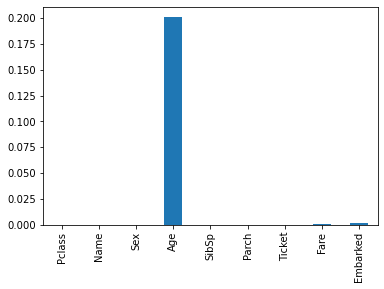

In [11]:
import matplotlib.pyplot as plt

# age에 null값이 가장 많다.
(all_df.isnull().sum() / len(all_df)).plot(kind = 'bar')
plt.show()

In [12]:
len(all_df)

1309

In [13]:
del all_df["Name"]
del all_df["Ticket"]

In [15]:
# 성별을 0과 1로
all_df["Sex"] = all_df["Sex"].replace({"male" : 0, "female" : 1})

In [16]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [17]:
# 출발 항구 one-hot
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
import numpy as np  
all_df["Embarked"] = all_df["Embarked"].replace({"S" : 0, "C" : 1,"Q" : 2, np.nan : 99 })

In [22]:
all_df["Embarked"].unique()

array([ 0,  1,  2, 99], dtype=int64)

In [ ]:
all_df.loc[
    (all_df["Pclass"] == 1) & (all_df["Age"].isnull())]